In [1]:
import yfinance as yf

# Define o ticker do Bitcoin
btc_data = yf.download("BTC-USD", start="2014-09-17", end="2024-10-30", interval="1d")

# Exibe os primeiros registros dos dados
print(btc_data.head())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

              Volume  
Date                  
2014-09-17  21056800  
2014-09-18  34483200  
2014-09-19  37919700  
2014-09-20  36863600  
2014-09-21  26580100  


In [2]:
import numpy as np

# Define o número de registros para treino e teste
train_size = int(0.7 * len(btc_data))
train_data = btc_data[:train_size]
test_data = btc_data[train_size:]

# Verifique as dimensões para garantir a divisão
print("Dados de treino:", train_data.shape)
print("Dados de teste:", test_data.shape)


Dados de treino: (2587, 6)
Dados de teste: (1109, 6)


In [3]:
import autograd.numpy as np  # Usando autograd para derivadas automáticas
from autograd import grad

# Extraindo o valor de 'Adj Close' para a predição
train_values = train_data['Adj Close'].values
test_values = test_data['Adj Close'].values


# Normaliza os dados de treino para evitar overflow
train_values_normalized = (train_values - np.mean(train_values)) / np.std(train_values)

# Função para criar as variáveis de entrada (X) e saída (y) do modelo
def create_dataset(data, k=3):
    X, y = [], []
    for i in range(k, len(data)):
        X.append(data[i-k:i])  # Coleta os valores passados
        y.append(data[i])      # Valor a ser previsto
    return np.array(X), np.array(y)

# Configura o número de valores passados a considerar (k)
k = 3  # Por exemplo, usar os últimos 3 dias para prever o próximo dia
X_train, y_train = create_dataset(train_values_normalized, k)

# Inicializa pesos e taxa de aprendizado para descida de gradiente
w = np.random.randn(k)  # Inicialização aleatória dos pesos
learning_rate = 0.01

# Função de erro para calcular o erro quadrático médio
def mse_loss(w, X, y):
    y_pred = np.dot(X, w)  # Calculo de predição linear
    return np.mean((y - y_pred) ** 2)

# Função de descida de gradiente usando autograd
mse_gradient = grad(mse_loss)

# Otimização com descida de gradiente
num_iterations = 1000
for i in range(num_iterations):
    grad_value = mse_gradient(w, X_train, y_train)
    w -= learning_rate * grad_value  # Atualização dos pesos

print("Pesos finais:", w)

Pesos finais: [0.16963363 0.1751511  0.65779654]


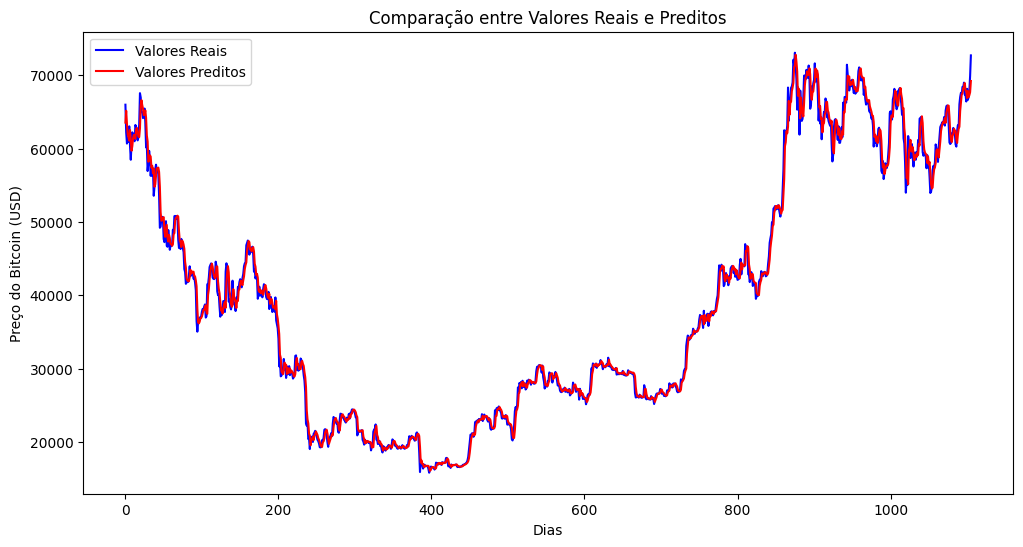

In [4]:
import matplotlib.pyplot as plt

# Normaliza os dados de teste usando a média e o desvio padrão dos dados de treino
test_values_normalized = (test_values - np.mean(train_values)) / np.std(train_values)

# Cria o conjunto de teste para entrada e saída
X_test, y_test = create_dataset(test_values_normalized, k)

# Realiza a predição usando os pesos finais
y_pred = np.dot(X_test, w)

# Desnormaliza os valores previstos e reais para voltarem ao valor original
y_pred = y_pred * np.std(train_values) + np.mean(train_values)
y_test = y_test * np.std(train_values) + np.mean(train_values)

# Gráfico de comparação
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Valores Reais', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Valores Preditos', color='red')
plt.xlabel('Dias')
plt.ylabel('Preço do Bitcoin (USD)')
plt.title('Comparação entre Valores Reais e Preditos')
plt.legend()
plt.show()


# AGRUPAR OS DADOS EM SEMANAS E MESES

In [5]:
# Agrupa os dados em médias semanais
btc_weekly = btc_data['Adj Close'].resample('W').mean()
btc_monthly = btc_data['Adj Close'].resample('M').mean()

# Verifique os dados
print("Dados semanais:\n", btc_weekly.head())
print("Dados mensais:\n", btc_monthly.head())


Dados semanais:
 Date
2014-09-21    416.859003
2014-09-28    407.692566
2014-10-05    361.426570
2014-10-12    355.234580
2014-10-19    390.479854
Freq: W-SUN, Name: Adj Close, dtype: float64
Dados mensais:
 Date
2014-09-30    407.182428
2014-10-31    364.148873
2014-11-30    366.099799
2014-12-31    341.267871
2015-01-31    248.782547
Freq: M, Name: Adj Close, dtype: float64


# SEMANAL

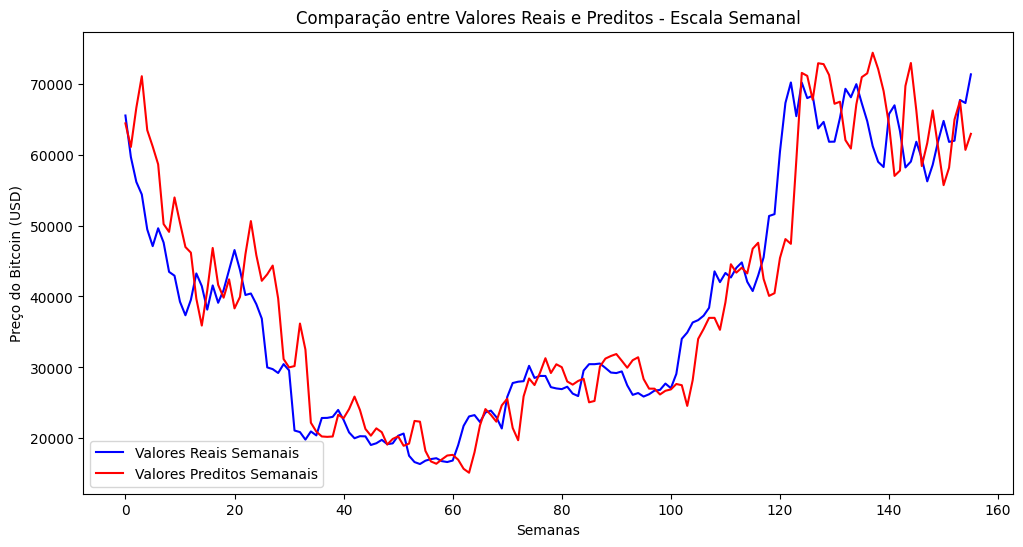

In [6]:
# Divide os dados semanais em treino e teste
train_size_weekly = int(0.7 * len(btc_weekly))
train_data_weekly = btc_weekly[:train_size_weekly]
test_data_weekly = btc_weekly[train_size_weekly:]

# Normaliza os dados de treino semanais
train_values_weekly = train_data_weekly.values
train_values_weekly_normalized = (train_values_weekly - np.mean(train_values_weekly)) / np.std(train_values_weekly)

# Cria os conjuntos de treino para a escala semanal
X_train_weekly, y_train_weekly = create_dataset(train_values_weekly_normalized, k)

# Reinicializa os pesos para o modelo semanal
w_weekly = np.random.randn(k)

# Descida de gradiente para a escala semanal
for i in range(num_iterations):
    grad_value = mse_gradient(w_weekly, X_train_weekly, y_train_weekly)
    w_weekly -= learning_rate * grad_value

# Avaliação e gráfico para a escala semanal
test_values_weekly_normalized = (test_data_weekly.values - np.mean(train_values_weekly)) / np.std(train_values_weekly)
X_test_weekly, y_test_weekly = create_dataset(test_values_weekly_normalized, k)
y_pred_weekly = np.dot(X_test_weekly, w_weekly)

# Desnormaliza os valores previstos semanais
y_pred_weekly = y_pred_weekly * np.std(train_values_weekly) + np.mean(train_values_weekly)
y_test_weekly = y_test_weekly * np.std(train_values_weekly) + np.mean(train_values_weekly)

# Gráfico de comparação para a escala semanal
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_weekly)), y_test_weekly, label='Valores Reais Semanais', color='blue')
plt.plot(range(len(y_pred_weekly)), y_pred_weekly, label='Valores Preditos Semanais', color='red')
plt.xlabel('Semanas')
plt.ylabel('Preço do Bitcoin (USD)')
plt.title('Comparação entre Valores Reais e Preditos - Escala Semanal')
plt.legend()
plt.show()


# MENSAL

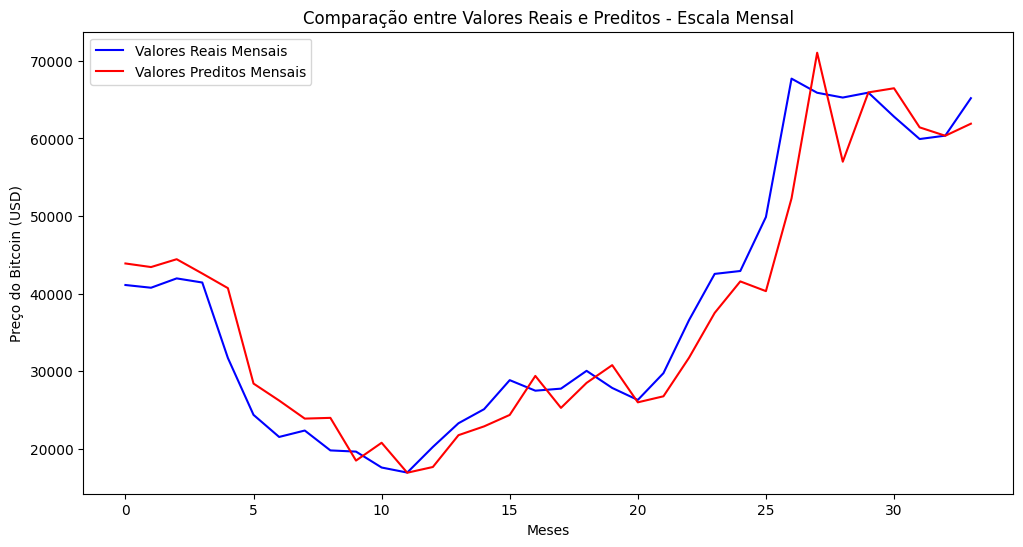

In [7]:
# Divide os dados mensais em treino e teste
train_size_monthly = int(0.7 * len(btc_monthly))
train_data_monthly = btc_monthly[:train_size_monthly]
test_data_monthly = btc_monthly[train_size_monthly:]

# Normaliza os dados de treino mensais
train_values_monthly = train_data_monthly.values
train_values_monthly_normalized = (train_values_monthly - np.mean(train_values_monthly)) / np.std(train_values_monthly)

# Cria os conjuntos de treino para a escala mensal
X_train_monthly, y_train_monthly = create_dataset(train_values_monthly_normalized, k)

# Reinicializa os pesos para o modelo mensal
w_monthly = np.random.randn(k)

# Descida de gradiente para a escala mensal
for i in range(num_iterations):
    grad_value = mse_gradient(w_monthly, X_train_monthly, y_train_monthly)
    w_monthly -= learning_rate * grad_value

# Avaliação e gráfico para a escala mensal
test_values_monthly_normalized = (test_data_monthly.values - np.mean(train_values_monthly)) / np.std(train_values_monthly)
X_test_monthly, y_test_monthly = create_dataset(test_values_monthly_normalized, k)
y_pred_monthly = np.dot(X_test_monthly, w_monthly)

# Desnormaliza os valores previstos mensais
y_pred_monthly = y_pred_monthly * np.std(train_values_monthly) + np.mean(train_values_monthly)
y_test_monthly = y_test_monthly * np.std(train_values_monthly) + np.mean(train_values_monthly)

# Gráfico de comparação para a escala mensal
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_monthly)), y_test_monthly, label='Valores Reais Mensais', color='blue')
plt.plot(range(len(y_pred_monthly)), y_pred_monthly, label='Valores Preditos Mensais', color='red')
plt.xlabel('Meses')
plt.ylabel('Preço do Bitcoin (USD)')
plt.title('Comparação entre Valores Reais e Preditos - Escala Mensal')
plt.legend()
plt.show()
